In [435]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# row, columns 길게 조회할 수 있게 옵션 걸어두기
pd.options.display.max_info_columns =200
pd.options.display.max_columns = 200
pd.options.display.max_info_rows =999
pd.options.display.max_rows = 999

In [448]:
# 한글글꼴
import warnings
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttfn"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

warnings.simplefilter(action='ignore')


## 변수명

- jur_stn : 관할 경찰서명
- year : 2017년 ~ 2020년 상/하반기

5. 112신고
- report_sx_남성, report_sx_불상,report_sx_여성, report_sx_total : 112 신고 건수(성별/전체)
- vio_cnt : 폭력 신고건수
- mur_rob_cnt : 살인,강도 신고건수
- car_cnt : 교통사고 신고 건수

6. 범죄발생
- 5m_crm_yn = 총 범죄 발생건 수
- theft_violence_x = 범죄 발생건 수(절도, 폭력 만 해당)
- robber_murder_x = 범죄 발생건 수(강도, 살인 만 해당)
- traffic_x = 범죄 발생건 수(교통 만 해당)
- public_x = 범죄 발생건 수(집회, 광고물, 국민기초만 해당)

7. 범죄검거
- crm = 총 범죄 검거건 수
- theft_violence_y = 범죄 검거건 수(절도, 폭력 만 해당)
- robber_murder_y = 범죄 검거건 수(강도, 살인 만 해당)
- traffic_y = 범죄 검거건 수(교통 만 해당)
- public_y = 범죄 검거건 수(집회, 광고물, 국민기초만 해당)

9. 보안등
- light_cnt : 새로 설치된 보안등 수

10. cctv
- cctv : 새로 설치된 cctv 수

11. 교통사고
- 차대사람, 차대차, 차량단독 : 해당 컬럼명별 교통사고 건수
- 가해_성별_기타불명, 가해_남, 가해_여 : 교통사고 가해 건수(성별)
- 피해_10대이하, 피해_20대, 피해_30대, 피해_40대, 피해_50대, 피해_60대, 피해_70대, 피해_80대이상 : 교통사고 건수(연령별)
- 피해_미분류, 피해_남, 피해_여 : 교통사고 피해 건수(성별)

12. 경찰직원 현황
- pol_num : 연도별 경찰서별 직원 수

14. 연령별 인구
- popu_합계: 전체 인구
- for_합계: 외국인 인구
- popu_u20: 20세 미만 인구
- popu_2030: 2030대 인구
- popu_4050: 4050대 인구
- popu_o60: 60세 이상 인구
- for_u20: 20세 미만 외국인 인구
- for_2030: 2030대 외국인 인구
- for_4050: 4050대 외국인 인구
- for_o60: 60세 이상 외국인 인구

15. 1인 가구
- single_합계: 전체 1인가구수
- single_u20: 20세 미만 1인가구수
- single_2030: 2030대 1인가구수
- single_4050: 4050대 1인가구수
- single_o60: 60세 이상 1인가구수
- single_f_합계: 전체 여성 1인가구수
- single_f_u20: 20세 미만 여성 1인가구수
- single_f_2030: 2030대 여성 1인가구수
- single_f_4050: 4050대 여성 1인가구수
- single_f_o60: 60세 이상 여성 1인가구수


21. 유흥업소
- adult : 새로 생긴 유흥업소 수

22. 비상벨
- bell : 새로 설치된 비상벨 수

4. 체감안전도 통계 (y)
- q1: 절도폭력 안전도 설문결과
- q2: 강도살인 안전도 설문결과
- q3: 교통사고 안전도 설문결과
- q4: 법질서 준수도 설문결과
- q5: 전반적 안전도 설문결과

# Featrue 가공

In [449]:
df=pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/processed_data(slack)/total_data(2016제외).csv')
df.head()

jur_stn       year  report_sx_남성  report_sx_불상  report_sx_여성  \
0   서울중부경찰서  2017(상반기)       13404.0        3239.0        5931.0   
1   서울종로경찰서  2017(상반기)       11579.0        2560.0        5534.0   
2  서울남대문경찰서  2017(상반기)        9093.0        1855.0        3551.0   
3  서울서대문경찰서  2017(상반기)       18441.0       10029.0       10298.0   
4   서울혜화경찰서  2017(상반기)       10829.0        2989.0        5038.0   

   report_sx_total  vio_cnt  mur_rob_cnt  car_cnt  5m_crm_yn  \
0          22574.0   1324.0          0.0   1412.0     3275.0   
1          19674.0   1102.0          0.0    867.0     2914.0   
2          14499.0    949.0          0.0    736.0     2506.0   
3          38769.0   1924.0          0.0   1788.0     4267.0   
4          18857.0   1127.0          0.0    899.0     2864.0   

   theft_violence_x  robber_murder_x  traffic_x  public_x     crm  \
0             572.0              4.0      347.0       0.0  2594.0   
1             525.0              2.0      202.0       8.0  2151.0   
2             413.0              0.0      248.0       7.0  1732.0   
3             674.0              0.0      335.0       1.0  3497.0   
4             427.0              4.0      542.0       0.0  2319.0   

   theft_violence_y  robber_murder_y  traffic_y  public_y  light_cnt   차대사람  \
0             236.0              3.0      336.0       1.0      210.0   74.0   
1             208.0              4.0      224.0      32.0        0.0   72.0   
2             224.0              0.0      242.0       9.0       10.0   63.0   
3             380.0              1.0      357.0       0.0        0.0  127.0   
4             170.0              5.0      567.0       0.0        0.0   68.0   

     차대차  차량단독  가해_성별_기타불명   가해_남  가해_여  가해_10대이하  가해_20대  가해_30대  가해_40대  \
0  190.0   6.0         8.0  220.0  42.0       4.0    40.0    36.0    42.0   
1  174.0   9.0         5.0  211.0  39.0       3.0    24.0    42.0    40.0   
2  182.0  10.0         5.0  213.0  37.0       1.0    25.0    38.0    40.0   
3  329.0  20.0         9.0  390.0  78.0      18.0    60.0    62.0    72.0   
4  180.0  11.0         9.0  216.0  33.0       2.0    36.0    35.0    44.0   

   가해_50대  가해_60대  가해_70대  가해_80대이상  가해_미분류   피해_남  피해_미분류   피해_여  피해_10대이하  \
0    69.0    48.0    22.0       2.0     8.0  198.0     6.0   65.0       8.0   
1    55.0    62.0    23.0       1.0     5.0  178.0    10.0   67.0       3.0   
2    65.0    57.0    22.0       2.0     5.0  192.0    11.0   52.0       3.0   
3   124.0    94.0    34.0       4.0     9.0  339.0    21.0  116.0      17.0   
4    66.0    51.0    15.0       2.0     9.0  190.0    12.0   56.0       3.0   

   피해_20대  피해_30대  피해_40대  피해_50대  피해_60대  피해_70대  피해_80대이상  cctv  pol_num  \
0    34.0    54.0    38.0    58.0    46.0    20.0       5.0   0.0    514.0   
1    32.0    53.0    47.0    55.0    35.0    16.0       6.0   9.0    641.0   
2    27.0    49.0    48.0    55.0    45.0    13.0       3.0   0.0    494.0   
3    76.0    73.0    83.0    95.0    73.0    28.0      10.0   0.0    659.0   
4    35.0    45.0    39.0    56.0    43.0    21.0       5.0   3.0    475.0   

    popu_합계   for_합계  popu_u20  popu_2030  popu_4050  popu_o60  for_u20  \
0   63948.0   5132.5    8387.0    21310.0    20143.0   14108.0    446.5   
1   78638.5   5489.5   11965.5    25221.5    24593.5   16858.0    558.0   
2   63948.0   5132.5    8387.0    21310.0    20143.0   14108.0    446.5   
3  321345.0  13152.0   49895.0   108132.0    97431.0   65887.0   1370.0   
4   78638.5   5489.5   11965.5    25221.5    24593.5   16858.0    558.0   

   for_2030  for_4050  for_o60  single_합계  single_u20  single_2030  \
0    2436.0    1651.0    599.0    10082.0       249.5       4310.5   
1    3031.5    1439.0    461.0    11819.0       253.5       5483.5   
2    2436.0    1651.0    599.0    10082.0       249.5       4310.5   
3    8272.0    2590.0    920.0    43418.0       797.0      23040.0   
4    3031.5    1439.0    461.0    11819.0       253.5       5483.5   

   single_4050  single_o60  single_f_합계  

## 변형 feature 생성(단위 %)
0. 의미에 따른 비율 feature 생성
- df['총범죄발생대비검거수'] = round(df['crm']/df['5m_crm_yn'],2)
- df['절도폭력범죄발생대비검거수'] = round(df['theft_violence_y']/df['theft_violence_x'],2)
- df['강도살인범죄발생대비검거수'] = round(df['robber_murder_y']/df['robber_murder_x'],2)
- df['교통사고범죄발생대비검거수'] = round(df['traffic_y']/df['traffic_x'],2)
- df['기초질서범죄발생대비검거수'] = round(df['public_y']/df['public_x'],2)
- df['인구수대비검거수'] = df['crm']/df['popu_합계']
- df['외국인인구수대비검거수'] = df['crm']/df['for_합계']

In [450]:
df['총범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['crm']/df['5m_crm_yn']).isin([np.nan,np.inf])[i]):
        df['총범죄발생대비검거수'][i] = 0.0
    else:
        df['총범죄발생대비검거수'][i] = ((df['crm']/df['5m_crm_yn'])[i])*100

df['절도폭력범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['theft_violence_y']/df['theft_violence_x']).isin([np.nan,np.inf])[i]):
        df['절도폭력범죄발생대비검거수'][i] = 0.0
    else:
        df['절도폭력범죄발생대비검거수'][i] = ((df['theft_violence_y']/df['theft_violence_x'])[i])*100

df['강도살인범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['robber_murder_y']/df['robber_murder_x']).isin([np.nan,np.inf])[i]):
        df['강도살인범죄발생대비검거수'][i] = 0.0
    else:
        df['강도살인범죄발생대비검거수'][i] = ((df['robber_murder_y']/df['robber_murder_x'])[i])*100

df['교통사고범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['traffic_y']/df['traffic_x']).isin([np.nan,np.inf])[i]):
        df['교통사고범죄발생대비검거수'][i] = 0.0
    else:
        df['교통사고범죄발생대비검거수'][i] = ((df['traffic_y']/df['traffic_x'])[i])*100
        
df['기초질서범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['public_y']/df['public_x']).isin([np.nan,np.inf])[i]):
        df['기초질서범죄발생대비검거수'][i] = 0.0
    else:
        df['기초질서범죄발생대비검거수'][i] = ((df['public_y']/df['public_x'])[i])*100
        
df['인구수대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['crm']/df['popu_합계']).isin([np.nan,np.inf])[i]):
        df['인구수대비검거수'][i] = 0.0
    else:
        df['인구수대비검거수'][i] = ((df['crm']/df['popu_합계'])[i])*100

df['외국인인구수대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['crm']/df['for_합계']).isin([np.nan,np.inf])[i]):
        df['외국인인구수대비검거수'][i] = 0.0
    else:
        df['외국인인구수대비검거수'][i] = ((df['crm']/df['for_합계'])[i])*100

df['인구수대비경찰수'] = 0.0
for i in range(len(df)):
    if ((df['pol_num']/df['popu_합계']).isin([np.nan,np.inf])[i]):
        df['인구수대비경찰수'][i] = 0.0
    else:
        df['인구수대비경찰수'][i] = ((df['pol_num']/df['popu_합계'])[i])*100

In [451]:
# 중복되는 컬럼 제거 및 변형피쳐에 사용된 자료 제거
df.drop(columns=['report_sx_남성','report_sx_불상','report_sx_여성','crm','5m_crm_yn','theft_violence_y','theft_violence_x','robber_murder_y','robber_murder_x','traffic_x','traffic_y','public_y','public_x','popu_합계','for_합계','pol_num'],inplace=True)

# 재정렬
df = df[['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', 'light_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남',
       '가해_여', '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대',
       '가해_70대', '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하',
       '피해_20대', '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상',
       'cctv', 'popu_u20', 'popu_2030', 'popu_4050', 'popu_o60',
       'for_u20', 'for_2030', 'for_4050', 'for_o60', 'single_합계', 'single_u20',
       'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'adult', 'bell','총범죄발생대비검거수',
       '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수', '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수',
       '인구수대비검거수', '외국인인구수대비검거수','인구수대비경찰수','q1', 'q2', 'q3', 'q4', 'q5', ]]
df

jur_stn       year  report_sx_total  vio_cnt  mur_rob_cnt  car_cnt  \
0     서울중부경찰서  2017(상반기)          22574.0   1324.0          0.0   1412.0   
1     서울종로경찰서  2017(상반기)          19674.0   1102.0          0.0    867.0   
2    서울남대문경찰서  2017(상반기)          14499.0    949.0          0.0    736.0   
3    서울서대문경찰서  2017(상반기)          38769.0   1924.0          0.0   1788.0   
4     서울혜화경찰서  2017(상반기)          18857.0   1127.0          0.0    899.0   
5     서울용산경찰서  2017(상반기)          39450.0   2933.0          0.0   2307.0   
6     서울성북경찰서  2017(상반기)          22517.0   1376.0          0.0   1276.0   
7    서울동대문경찰서  2017(상반기)          45150.0   2968.0          0.0   2264.0   
8     서울마포경찰서  2017(상반기)          56203.0   3752.0          0.0   3474.0   
9    서울영등포경찰서  2017(상반기)          56925.0   3943.0          0.0   3353.0   
10    서울성동경찰서  2017(상반기)          30504.0   1873.0          0.0   2160.0   
11    서울동작경찰서  2017(상반기)          37148.0   2580.0          0.0   2189.0   
12    서울광진경찰서  2017(상반기)          47597.0   3332.0          0.0   2615.0   
13    서울서부경찰서  2017(상반기)          19107.0   1284.0          0.0    890.0   
14    서울강북경찰서  2017(상반기)          40389.0   3545.0          0.0   1703.0   
15    서울금천경찰서  2017(상반기)          33048.0   2905.0          0.0   1975.0   
16    서울중랑경찰서  2017(상반기)          52313.0   4118.0          0.0   2383.0   
17    서울강남경찰서  2017(상반기)          51771.0   3119.0          0.0   4519.0   
18    서울관악경찰서  2017(상반기)          60450.0   4441.0          0.0   3039.0   
19    서울강서경찰서  2017(상반기)          58919.0   4514.0          0.0   3326.0   
20    서울강동경찰서  2017(상반기)          46081.0   3363.0          0.0   2625.0   
21    서울종암경찰서  2017(상반기)          17563.0   1211.0          0.0   1102.0   
22    서울구로경찰서  2017(상반기)          45756.0   3742.0          0.0   2579.0   
23    서울서초경찰서  2017(상반기)          41540.0   2522.0          0.0   3374.0   
24    서울양천경찰서  2017(상반기)          39069.0   2699.0          0.0   2523.0   
25    서울송파경찰서  2017(상반기)          66858.0   4490.0          0.0   4388.0   
26    서울노원경찰서  2017(상반기)          48389.0   3818.0          0.0   2668.0   
27    서울방배경찰서  2017(상반기)          14334.0    697.0          0.0   1189.0   
28    서울은평경찰서  2017(상반기)          29217.0   2282.0          0.0   1285.0   
29    서울도봉경찰서  2017(상반기)          29392.0   2321.0          0.0   1432.0   
30    서울수서경찰서  2017(상반기)          35963.0   2222.0          0.0   2334.0   
31    수원중부경찰서  2017(상반기)          41284.0   3127.0          0.0   2843.0   
32    수원남부경찰서  2017(상반기)          54711.0   4436.0          0.0   4460.0   
33    수원서부경찰서  2017(상반기)          35323.0   3021.0          0.0   2561.0   
34      세종경찰서  2017(상반기)          16700.0   1064.0          0.0   1915.0   
35    창원중부경찰서  2017(상반기)          23591.0   1611.0          0.0   2339.0   
36    창원서부경찰서  2017(상반기)          19824.0   1335.0          0.0   1836.0   
37    마산중부경찰서  2017(상반기)          17416.0   1103.0          0.0   1258.0   
38    마산동부경찰서  2017(상반기)          21553.0   1522.0          0.0   1738.0   
39      진주경찰서  2017(상반기)          32112.0   2263.0          0.0   2975.0   
40      진해경찰서  2017(상반기)          15505.0   1203.0          0.0   1251.0   
41    서울중부경찰서  2017(하반기)          24854.0   1443.0          0.0   1631.0   
42    서울종로경찰서  2017(하반기)          22317.0   1242.0          0.0    942.0   
43   서울남대문경찰서  2017(하반기)          16257.0   1037.0          0.0    883.0   
44   서울서대문경찰서  2017(하반기)          42272.0   2038.0          0.0   2069.0   
45    서울혜화경찰서  2017(하반기)          20483.0   1133.0          0.0   1054.0   
46    서울용산경찰서  2017(하반기)          42086.0   2942.0          0.0   2606.0   
47    서울성북경찰서  2017(하반기)          24375.0   1447.0          0.0   1406.0   
48   서울동대문경찰서  2017(하반기)          49356.0   3312.0          0.0   2587.0   
49    서울마포경찰서  2017(하반기)          62365.0   3939.0          0.0   3878.0   
50   서울영등포경찰서  2017(하반기)          64247.0   4203.0          0.0   3805.0   
51    서울성동경찰서  2017(하반기)          33685.0   2000.0    

## 전년도 y데이터를 변수로 사용
- 모델의 성능 개선을 위해, 전년도 안전도(y데이터)를 현재년도 feature값으로 사용
- 외부 데이터 (2016년 체감안전도) 데이터 사용
- 2016년 상하 -> 2017년 상하 / 2017년 상하 -> 2018년 상하 / 2018년 상하 -> 2019년 상하 / 2019년 상하 -> 2020년 상하
- https://www.bigdata-policing.kr/policy/contents/policy-dataSearch.do?schM=View&dbiIdx=19
- Q1 절도폭력안전도 : 19번
- Q2 강도살인안전도 : 20번
- Q3 교통사고안전도 : 17번
- Q4 법질서준수도 : 18번
- Q5 전반적인안전도 : 14번

In [452]:
# 데이터 불러오기
df16_1 = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/data/2016(상반기).csv',header=None)
df16_2 = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/data/2016(하반기).csv',header=None)

In [453]:
# 필요한 인덱스만 불러오고 컬럼명 변경
df16_1 = df16_1[[0,1,19,20,17,18,14]]
df16_1.rename(columns={0:'year',1:'jur_stn',19:'q1',20:'q2',17:'q3',18:'q4',14:'q5'},inplace=True)
df16_1['year'] = '2016(상반기)'

df16_2 = df16_2[[0,1,19,20,17,18,14]]
df16_2.rename(columns={0:'year',1:'jur_stn',19:'q1',20:'q2',17:'q3',18:'q4',14:'q5'},inplace=True)
df16_2['year'] = '2016(하반기)'

In [454]:
# 경찰서명 통일 안된 애들 10개 : 수원 3, 세종 1, 창원 2, 마산 2, 진주 1, 진해 1 이름 변경필요 한 것 확인
df_base = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/data/base_df.csv')
df_base = df_base['jur_stn']
df_base.drop_duplicates(inplace=True)

df_test = pd.merge(df_base,df16_1,how='left',on='jur_stn')
df_test.tail(10)

jur_stn year  q1  q2  q3  q4  q5
31  수원중부경찰서  NaN NaN NaN NaN NaN NaN
32  수원남부경찰서  NaN NaN NaN NaN NaN NaN
33  수원서부경찰서  NaN NaN NaN NaN NaN NaN
34    세종경찰서  NaN NaN NaN NaN NaN NaN
35  창원중부경찰서  NaN NaN NaN NaN NaN NaN
36  창원서부경찰서  NaN NaN NaN NaN NaN NaN
37  마산중부경찰서  NaN NaN NaN NaN NaN NaN
38  마산동부경찰서  NaN NaN NaN NaN NaN NaN
39    진주경찰서  NaN NaN NaN NaN NaN NaN
40    진해경찰서  NaN NaN NaN NaN NaN NaN

In [455]:
for i in range(len(df16_1)):
    if df16_1['jur_stn'][i] == '경기남부수원남부경찰서':
        df16_1['jur_stn'][i] = '수원남부경찰서'
    elif df16_1['jur_stn'][i] == '경기남부수원서부경찰서':
        df16_1['jur_stn'][i] = '수원서부경찰서'
    elif df16_1['jur_stn'][i] == '경기남부수원중부경찰서':
        df16_1['jur_stn'][i] = '수원중부경찰서'
    elif df16_1['jur_stn'][i] == '경남마산동부경찰서':
        df16_1['jur_stn'][i] = '마산동부경찰서'
    elif df16_1['jur_stn'][i] == '경남마산중부경찰서':
        df16_1['jur_stn'][i] = '마산중부경찰서'
    elif df16_1['jur_stn'][i] == '경남진주경찰서':
        df16_1['jur_stn'][i] = '진주경찰서'
    elif df16_1['jur_stn'][i] == '경남진해경찰서':
        df16_1['jur_stn'][i] = '진해경찰서'
    elif df16_1['jur_stn'][i] == '경남창원서부경찰서':
        df16_1['jur_stn'][i] = '창원서부경찰서'
    elif df16_1['jur_stn'][i] == '경남창원중부경찰서':
        df16_1['jur_stn'][i] = '창원중부경찰서'
    elif df16_1['jur_stn'][i] == '충남세종경찰서':
        df16_1['jur_stn'][i] = '세종경찰서'
        
for i in range(len(df16_2)):
    if df16_2['jur_stn'][i] == '경기남부수원남부경찰서':
        df16_2['jur_stn'][i] = '수원남부경찰서'
    elif df16_2['jur_stn'][i] == '경기남부수원서부경찰서':
        df16_2['jur_stn'][i] = '수원서부경찰서'
    elif df16_2['jur_stn'][i] == '경기남부수원중부경찰서':
        df16_2['jur_stn'][i] = '수원중부경찰서'
    elif df16_2['jur_stn'][i] == '경남마산동부경찰서':
        df16_2['jur_stn'][i] = '마산동부경찰서'
    elif df16_2['jur_stn'][i] == '경남마산중부경찰서':
        df16_2['jur_stn'][i] = '마산중부경찰서'
    elif df16_2['jur_stn'][i] == '경남진주경찰서':
        df16_2['jur_stn'][i] = '진주경찰서'
    elif df16_2['jur_stn'][i] == '경남진해경찰서':
        df16_2['jur_stn'][i] = '진해경찰서'
    elif df16_2['jur_stn'][i] == '경남창원서부경찰서':
        df16_2['jur_stn'][i] = '창원서부경찰서'
    elif df16_2['jur_stn'][i] == '경남창원중부경찰서':
        df16_2['jur_stn'][i] = '창원중부경찰서'
    elif df16_2['jur_stn'][i] == '충남세종경찰서':
        df16_2['jur_stn'][i] = '세종경찰서'        

In [456]:
# 이상없이 merge가 된다
df_base1 = pd.merge(df_base,df16_1,how='left',on='jur_stn')
df_base2 = pd.merge(df_base,df16_2,how='left',on='jur_stn')
df_16 = pd.concat([df_base1,df_base2])
# 인덱스 초기화
df_16.index = range(len(df_16))
print(len(df_16))
df_16

82


jur_stn       year    q1    q2    q3    q4    q5
0    서울중부경찰서  2016(상반기)  76.0  79.0  66.5  62.3  71.3
1    서울종로경찰서  2016(상반기)  75.3  78.3  68.8  62.3  73.0
2   서울남대문경찰서  2016(상반기)  75.5  80.8  65.8  52.0  69.5
3   서울서대문경찰서  2016(상반기)  72.8  70.5  67.5  61.5  66.5
4    서울혜화경찰서  2016(상반기)  73.8  75.0  66.0  61.0  69.5
5    서울용산경찰서  2016(상반기)  75.0  78.5  67.5  63.5  69.0
6    서울성북경찰서  2016(상반기)  78.0  81.0  69.5  57.0  72.5
7   서울동대문경찰서  2016(상반기)  76.3  75.5  72.8  59.5  68.5
8    서울마포경찰서  2016(상반기)  74.8  78.0  72.5  63.8  72.5
9   서울영등포경찰서  2016(상반기)  65.5  68.8  68.3  60.0  64.5
10   서울성동경찰서  2016(상반기)  70.0  71.5  61.0  58.5  68.3
11   서울동작경찰서  2016(상반기)  70.5  70.0  62.0  55.3  67.8
12   서울광진경찰서  2016(상반기)  72.8  76.3  62.8  53.8  66.8
13   서울서부경찰서  2016(상반기)  75.0  73.5  69.0  56.5  70.3
14   서울강북경찰서  2016(상반기)  66.3  67.3  64.8  51.3  65.3
15   서울금천경찰서  2016(상반기)  70.0  71.3  67.0  58.0  67.8
16   서울중랑경찰서  2016(상반기)  65.8  66.0  64.5  52.8  62.5
17   서울강남경찰서  2016(상반기)  83.8  84.8  71.8  70.8  77.0
18   서울관악경찰서  2016(상반기)  68.8  73.3  66.3  57.8  66.8
19   서울강서경찰서  2016(상반기)  72.3  74.0  71.5  68.0  69.5
20   서울강동경찰서  2016(상반기)  79.3  83.8  70.8  67.3  74.3
21   서울종암경찰서  2016(상반기)  74.3  73.0  67.3  61.0  68.0
22   서울구로경찰서  2016(상반기)  63.0  64.0  61.0  61.8  59.8
23   서울서초경찰서  2016(상반기)  77.8  78.0  67.8  63.5  71.5
24   서울양천경찰서  2016(상반기)  78.8  81.0  70.0  66.0  75.8
25   서울송파경찰서  2016(상반기)  77.8  76.8  69.0  68.8  72.8
26   서울노원경찰서  2016(상반기)  74.8  75.0  67.8  56.3  69.0
27   서울방배경찰서  2016(상반기)  79.8  85.3  69.0  71.8  79.3
28   서울은평경찰서  2016(상반기)  73.5  76.8  66.3  58.0  69.5
29   서울도봉경찰서  2016(상반기)  71.5  70.8  65.3  59.0  66.5
30   서울수서경찰서  2016(상반기)  79.5  82.0  71.8  70.0  76.3
31   수원중부경찰서  2016(상반기)  71.0  71.3  71.0  58.8  68.8
32   수원남부경찰서  2016(상반기)  74.3  75.8  61.0  61.0  68.8
33   수원서부경찰서  2016(상반기)  68.8  69.3  67.3  59.8  64.8
34     세종경찰서  2016(상반기)  76.0  75.4  60.9  62.6  68.9
35   창원중부경찰서  2016(상반기)  70.5  73.3  63.8  59.0  67.5
36   창원서부경찰서  2016(상반기)  74.3  74.8  65.3  58.8  69.8
37   마산중부경찰서  2016(상반기)  86.5  81.5  71.0  60.0  73.3
38   마산동부경찰서  2016(상반기)  74.5  73.3  65.3  61.0  67.8
39     진주경찰서  2016(상반기)  65.0  66.3  57.5  55.3  61.8
40     진해경찰서  2016(상반기)  74.3  75.5  65.3  58.5  69.5
41   서울중부경찰서  2016(하반기)  79.0  80.3  67.3  53.3  71.5
42   서울종로경찰서  2016(하반기)  82.0  82.8  69.5  70.3  77.5
43  서울남대문경찰서  2016(하반기)  77.0  76.3  73.5  57.8  72.8
44  서울서대문경찰서  2016(하반기)  70.0  71.8  65.8  57.5  67.3
45   서울혜화경찰서  2016(하반기)  73.3  72.3  66.5  54.0  67.5
46   서울용산경찰서  2016(하반기)  73.8  76.5  70.5  58.3  71.0
47   서울성북경찰서  2016(하반기)  77.5  81.5  71.0  62.8  74.0
48  서울동대문경찰서  2016(하반기)  73.3  74.8  68.8  58.0  70.8
49   서울마포경찰서  2016(하반기)  71.5  73.3  65.8  58.8  65.8
50  서울영등포경찰서  2016(하반기)  70.0  74.8  65.5  56.0  68.0
51   서울성동경찰서  2016(하반기)  74.0  79.5  72.3  59.0  69.3
52   서울동작경찰서  2016(하반기)  71.8  77.8  61.5  60.5  69.0
53   서울광진경찰서  2016(하반기)  73.8  72.0  67.5  56.5  70.0
54   서울서부경찰서  2016(하반기)  71.5  73.5  66.5  54.0  64.8
55   서울강북경찰서  2016(하반기)  67.0  69.3  66.0  55.8  65.8
56   서울금천경찰서  2016(하반기)  72.8  72.8  66.5  50.3  65.5
57   서울중랑경찰서  2016(하반기)  64.8  68.8  60.5  52.8  61.3
58   서울강남경찰서  2016(하반기)  79.8  81.0  66.8  61.3  73.0
59   서울관악경찰서  2016(하반기)  68.0  71.5  61.3  55.3  65.0
60   서울강서경찰서  2016(하반기)  74.8  78.8  71.5  62.8  71.8
61   서울강동경찰서  2016(하반기)  71.5  68.3  63.3  53.5  65.8
62   서울종암경찰서  2016(하반기)  73.3  77.8  70.5  56.3  70.3
63   서울구로경찰서  2016(하반기)  78.0  82.5  70.5  65.8  73.3
64   서울서초경찰서  2016(하반기)  73.5  73.3  63.8  63.8  72.0
65   서울양천경찰서  2016(하반기)  76.0  78.0  67.8  59.5  68.3
66   서울송파경찰서  2016(하반기)  79.8  78.8  67.5  67.5  73.3
67   서울노원경찰서  2016(하반기)  83.0  80.8  72.3  64.5  75.0
68   서울방배경찰서  2016(하반기)  76.8  77.8  72.5  70.3  76.5
69   서울은평경찰서  2016(하반기)  74.3  78.5  69.5  66.8  73.3
70   서울도봉경찰서  2016(하반기)  71.3  73.0  65.3  54.5  64.5
71   서울수서경찰서  2016(하반기)  80.3  79.3  73.5  68.0  76.0
72   수원중부경찰서  2016(하반기)  72.0  70.8  65.5  55.5  66.5
73   수원남부

In [457]:
# 기존 데이터의 q1~q5값을 가져와서 붙이자
df_year = df[['jur_stn','year','q1','q2','q3','q4','q5']]
df_year_feature = pd.concat([df_16,df_year])
df_year_feature.index = range(len(df_year_feature))
## 16년 ~20년 각 상/하반기 41개 경찰서 = 410개 row 생성되는지 확인
print(len(df_year_feature))
df_year_feature

410


jur_stn       year    q1    q2    q3    q4    q5
0     서울중부경찰서  2016(상반기)  76.0  79.0  66.5  62.3  71.3
1     서울종로경찰서  2016(상반기)  75.3  78.3  68.8  62.3  73.0
2    서울남대문경찰서  2016(상반기)  75.5  80.8  65.8  52.0  69.5
3    서울서대문경찰서  2016(상반기)  72.8  70.5  67.5  61.5  66.5
4     서울혜화경찰서  2016(상반기)  73.8  75.0  66.0  61.0  69.5
5     서울용산경찰서  2016(상반기)  75.0  78.5  67.5  63.5  69.0
6     서울성북경찰서  2016(상반기)  78.0  81.0  69.5  57.0  72.5
7    서울동대문경찰서  2016(상반기)  76.3  75.5  72.8  59.5  68.5
8     서울마포경찰서  2016(상반기)  74.8  78.0  72.5  63.8  72.5
9    서울영등포경찰서  2016(상반기)  65.5  68.8  68.3  60.0  64.5
10    서울성동경찰서  2016(상반기)  70.0  71.5  61.0  58.5  68.3
11    서울동작경찰서  2016(상반기)  70.5  70.0  62.0  55.3  67.8
12    서울광진경찰서  2016(상반기)  72.8  76.3  62.8  53.8  66.8
13    서울서부경찰서  2016(상반기)  75.0  73.5  69.0  56.5  70.3
14    서울강북경찰서  2016(상반기)  66.3  67.3  64.8  51.3  65.3
15    서울금천경찰서  2016(상반기)  70.0  71.3  67.0  58.0  67.8
16    서울중랑경찰서  2016(상반기)  65.8  66.0  64.5  52.8  62.5
17    서울강남경찰서  2016(상반기)  83.8  84.8  71.8  70.8  77.0
18    서울관악경찰서  2016(상반기)  68.8  73.3  66.3  57.8  66.8
19    서울강서경찰서  2016(상반기)  72.3  74.0  71.5  68.0  69.5
20    서울강동경찰서  2016(상반기)  79.3  83.8  70.8  67.3  74.3
21    서울종암경찰서  2016(상반기)  74.3  73.0  67.3  61.0  68.0
22    서울구로경찰서  2016(상반기)  63.0  64.0  61.0  61.8  59.8
23    서울서초경찰서  2016(상반기)  77.8  78.0  67.8  63.5  71.5
24    서울양천경찰서  2016(상반기)  78.8  81.0  70.0  66.0  75.8
25    서울송파경찰서  2016(상반기)  77.8  76.8  69.0  68.8  72.8
26    서울노원경찰서  2016(상반기)  74.8  75.0  67.8  56.3  69.0
27    서울방배경찰서  2016(상반기)  79.8  85.3  69.0  71.8  79.3
28    서울은평경찰서  2016(상반기)  73.5  76.8  66.3  58.0  69.5
29    서울도봉경찰서  2016(상반기)  71.5  70.8  65.3  59.0  66.5
30    서울수서경찰서  2016(상반기)  79.5  82.0  71.8  70.0  76.3
31    수원중부경찰서  2016(상반기)  71.0  71.3  71.0  58.8  68.8
32    수원남부경찰서  2016(상반기)  74.3  75.8  61.0  61.0  68.8
33    수원서부경찰서  2016(상반기)  68.8  69.3  67.3  59.8  64.8
34      세종경찰서  2016(상반기)  76.0  75.4  60.9  62.6  68.9
35    창원중부경찰서  2016(상반기)  70.5  73.3  63.8  59.0  67.5
36    창원서부경찰서  2016(상반기)  74.3  74.8  65.3  58.8  69.8
37    마산중부경찰서  2016(상반기)  86.5  81.5  71.0  60.0  73.3
38    마산동부경찰서  2016(상반기)  74.5  73.3  65.3  61.0  67.8
39      진주경찰서  2016(상반기)  65.0  66.3  57.5  55.3  61.8
40      진해경찰서  2016(상반기)  74.3  75.5  65.3  58.5  69.5
41    서울중부경찰서  2016(하반기)  79.0  80.3  67.3  53.3  71.5
42    서울종로경찰서  2016(하반기)  82.0  82.8  69.5  70.3  77.5
43   서울남대문경찰서  2016(하반기)  77.0  76.3  73.5  57.8  72.8
44   서울서대문경찰서  2016(하반기)  70.0  71.8  65.8  57.5  67.3
45    서울혜화경찰서  2016(하반기)  73.3  72.3  66.5  54.0  67.5
46    서울용산경찰서  2016(하반기)  73.8  76.5  70.5  58.3  71.0
47    서울성북경찰서  2016(하반기)  77.5  81.5  71.0  62.8  74.0
48   서울동대문경찰서  2016(하반기)  73.3  74.8  68.8  58.0  70.8
49    서울마포경찰서  2016(하반기)  71.5  73.3  65.8  58.8  65.8
50   서울영등포경찰서  2016(하반기)  70.0  74.8  65.5  56.0  68.0
51    서울성동경찰서  2016(하반기)  74.0  79.5  72.3  59.0  69.3
52    서울동작경찰서  2016(하반기)  71.8  77.8  61.5  60.5  69.0
53    서울광진경찰서  2016(하반기)  73.8  72.0  67.5  56.5  70.0
54    서울서부경찰서  2016(하반기)  71.5  73.5  66.5  54.0  64.8
55    서울강북경찰서  2016(하반기)  67.0  69.3  66.0  55.8  65.8
56    서울금천경찰서  2016(하반기)  72.8  72.8  66.5  50.3  65.5
57    서울중랑경찰서  2016(하반기)  64.8  68.8  60.5  52.8  61.3
58    서울강남경찰서  2016(하반기)  79.8  81.0  66.8  61.3  73.0
59    서울관악경찰서  2016(하반기)  68.0  71.5  61.3  55.3  65.0
60    서울강서경찰서  2016(하반기)  74.8  78.8  71.5  62.8  71.8
61    서울강동경찰서  2016(하반기)  71.5  68.3  63.3  53.5  65.8
62    서울종암경찰서  2016(하반기)  73.3  77.8  70.5  56.3  70.3
63    서울구로경찰서  2016(하반기)  78.0  82.5  70.5  65.8  73.3
64    서울서초경찰서  2016(하반기)  73.5  73.3  63.8  63.8  72.0
65    서울양천경찰서  2016(하반기)  76.0  78.0  67.8  59.5  68.3
66    서울송파경찰서  2016(하반기)  79.8  78.8  67.5  67.5  73.3
67    서울노원경찰서  2016(하반기)  83.0  80.8  72.3  64.5  75.0
68    서울방배경찰서  2016(하반기)  76.8  77.8  72.5  70.3  76.5
69    서울은평경찰서  2016(하반기)  74.3  78.5  69.5  66.8  73.3
70    서울도봉경찰서  2016(하반기)  71.3  73.0  65.3  54.5  64.5
71    서울수서경찰서  2016(하반기)  80.3  79.3  73.5  68

In [458]:
# 변수명을 바꿔준다 
## 2016년 상하 -> 2017년 상하 / 2017년 상하 -> 2018년 상하 / 2018년 상하 -> 2019년 상하 / 2019년 상하 -> 2020년 상하 
## q1-q5 -> before_q1 ~ before_15
df_year_feature.rename(columns = {'q1':'before_q1','q2':'before_q2','q3':'before_q3','q4':'before_q4','q5':'before_q5'},inplace=True)
df_year_feature['new_year'] = '버림'
for i in range(len(df_year_feature)):
    if df_year_feature['year'][i] == '2016(상반기)':
        df_year_feature['new_year'][i] = '2017(상반기)'
    elif df_year_feature['year'][i] == '2016(하반기)':
        df_year_feature['new_year'][i] = '2017(하반기)'
    elif df_year_feature['year'][i] == '2017(상반기)':
        df_year_feature['new_year'][i] = '2018(상반기)'
    elif df_year_feature['year'][i] == '2017(하반기)':
        df_year_feature['new_year'][i] = '2018(하반기)'
    elif df_year_feature['year'][i] == '2018(상반기)':
        df_year_feature['new_year'][i] = '2019(상반기)'
    elif df_year_feature['year'][i] == '2018(하반기)':
        df_year_feature['new_year'][i] = '2019(하반기)'
    elif df_year_feature['year'][i] == '2019(상반기)':
        df_year_feature['new_year'][i] = '2020(상반기)'
    elif df_year_feature['year'][i] == '2019(하반기)':
        df_year_feature['new_year'][i] = '2020(하반기)'
    elif df_year_feature['year'][i] == '2020(상반기)':
        df_year_feature['new_year'][i] = '버림'
    elif df_year_feature['year'][i] == '2020(상반기)':
        df_year_feature['new_year'][i] = '버림'        

In [459]:
# 컬럼 재정렬
df_year_feature = df_year_feature[['jur_stn','new_year','before_q1','before_q2','before_q3','before_q4','before_q5']]
df_year_feature.rename(columns={'new_year':'year'},inplace=True)

# 기존 데이터셋과 합쳐주기 + 컬럼 순서 재정렬
df = pd.merge(df,df_year_feature,how='left',on=('jur_stn','year'))
df = df[['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', 'light_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남',
       '가해_여', '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대',
       '가해_70대', '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하',
       '피해_20대', '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상',
       'cctv', 'popu_u20', 'popu_2030', 'popu_4050', 'popu_o60',
       'for_u20', 'for_2030', 'for_4050', 'for_o60', 'single_합계', 'single_u20',
       'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'adult', 'bell', '총범죄발생대비검거수', '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수',
       '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수', '외국인인구수대비검거수','인구수대비경찰수',
        'before_q1', 'before_q2', 'before_q3', 'before_q4','before_q5','q1', 'q2',
       'q3', 'q4', 'q5']]

In [460]:
# 비율 feature 및 전년도 안전도 feature 잘 들어갔는지 확인
df

jur_stn       year  report_sx_total  vio_cnt  mur_rob_cnt  car_cnt  \
0     서울중부경찰서  2017(상반기)          22574.0   1324.0          0.0   1412.0   
1     서울종로경찰서  2017(상반기)          19674.0   1102.0          0.0    867.0   
2    서울남대문경찰서  2017(상반기)          14499.0    949.0          0.0    736.0   
3    서울서대문경찰서  2017(상반기)          38769.0   1924.0          0.0   1788.0   
4     서울혜화경찰서  2017(상반기)          18857.0   1127.0          0.0    899.0   
5     서울용산경찰서  2017(상반기)          39450.0   2933.0          0.0   2307.0   
6     서울성북경찰서  2017(상반기)          22517.0   1376.0          0.0   1276.0   
7    서울동대문경찰서  2017(상반기)          45150.0   2968.0          0.0   2264.0   
8     서울마포경찰서  2017(상반기)          56203.0   3752.0          0.0   3474.0   
9    서울영등포경찰서  2017(상반기)          56925.0   3943.0          0.0   3353.0   
10    서울성동경찰서  2017(상반기)          30504.0   1873.0          0.0   2160.0   
11    서울동작경찰서  2017(상반기)          37148.0   2580.0          0.0   2189.0   
12    서울광진경찰서  2017(상반기)          47597.0   3332.0          0.0   2615.0   
13    서울서부경찰서  2017(상반기)          19107.0   1284.0          0.0    890.0   
14    서울강북경찰서  2017(상반기)          40389.0   3545.0          0.0   1703.0   
15    서울금천경찰서  2017(상반기)          33048.0   2905.0          0.0   1975.0   
16    서울중랑경찰서  2017(상반기)          52313.0   4118.0          0.0   2383.0   
17    서울강남경찰서  2017(상반기)          51771.0   3119.0          0.0   4519.0   
18    서울관악경찰서  2017(상반기)          60450.0   4441.0          0.0   3039.0   
19    서울강서경찰서  2017(상반기)          58919.0   4514.0          0.0   3326.0   
20    서울강동경찰서  2017(상반기)          46081.0   3363.0          0.0   2625.0   
21    서울종암경찰서  2017(상반기)          17563.0   1211.0          0.0   1102.0   
22    서울구로경찰서  2017(상반기)          45756.0   3742.0          0.0   2579.0   
23    서울서초경찰서  2017(상반기)          41540.0   2522.0          0.0   3374.0   
24    서울양천경찰서  2017(상반기)          39069.0   2699.0          0.0   2523.0   
25    서울송파경찰서  2017(상반기)          66858.0   4490.0          0.0   4388.0   
26    서울노원경찰서  2017(상반기)          48389.0   3818.0          0.0   2668.0   
27    서울방배경찰서  2017(상반기)          14334.0    697.0          0.0   1189.0   
28    서울은평경찰서  2017(상반기)          29217.0   2282.0          0.0   1285.0   
29    서울도봉경찰서  2017(상반기)          29392.0   2321.0          0.0   1432.0   
30    서울수서경찰서  2017(상반기)          35963.0   2222.0          0.0   2334.0   
31    수원중부경찰서  2017(상반기)          41284.0   3127.0          0.0   2843.0   
32    수원남부경찰서  2017(상반기)          54711.0   4436.0          0.0   4460.0   
33    수원서부경찰서  2017(상반기)          35323.0   3021.0          0.0   2561.0   
34      세종경찰서  2017(상반기)          16700.0   1064.0          0.0   1915.0   
35    창원중부경찰서  2017(상반기)          23591.0   1611.0          0.0   2339.0   
36    창원서부경찰서  2017(상반기)          19824.0   1335.0          0.0   1836.0   
37    마산중부경찰서  2017(상반기)          17416.0   1103.0          0.0   1258.0   
38    마산동부경찰서  2017(상반기)          21553.0   1522.0          0.0   1738.0   
39      진주경찰서  2017(상반기)          32112.0   2263.0          0.0   2975.0   
40      진해경찰서  2017(상반기)          15505.0   1203.0          0.0   1251.0   
41    서울중부경찰서  2017(하반기)          24854.0   1443.0          0.0   1631.0   
42    서울종로경찰서  2017(하반기)          22317.0   1242.0          0.0    942.0   
43   서울남대문경찰서  2017(하반기)          16257.0   1037.0          0.0    883.0   
44   서울서대문경찰서  2017(하반기)          42272.0   2038.0          0.0   2069.0   
45    서울혜화경찰서  2017(하반기)          20483.0   1133.0          0.0   1054.0   
46    서울용산경찰서  2017(하반기)          42086.0   2942.0          0.0   2606.0   
47    서울성북경찰서  2017(하반기)          24375.0   1447.0          0.0   1406.0   
48   서울동대문경찰서  2017(하반기)          49356.0   3312.0          0.0   2587.0   
49    서울마포경찰서  2017(하반기)          62365.0   3939.0          0.0   3878.0   
50   서울영등포경찰서  2017(하반기)          64247.0   4203.0          0.0   3805.0   
51    서울성동경찰서  2017(하반기)          33685.0   2000.0    

## 보안등,비상벨,CCTV,유흥업소 증감율 컬럼 생성(단위 : %)
- cumsum을 통한 증감율 계산

In [461]:
df_cs = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/processed_data(slack)/total_data(2016포함).csv')
df_cs = df_cs[['jur_stn','year','light_cnt','cctv','adult','bell']]
df_cs

jur_stn       year  light_cnt  cctv  adult   bell
0     서울중부경찰서   2016(이전)        0.0  1563  198.0  198.0
1     서울종로경찰서   2016(이전)        0.0   667  146.0  146.0
2    서울남대문경찰서   2016(이전)        0.0   725   87.0   87.0
3    서울서대문경찰서   2016(이전)        0.0  2938   74.0   74.0
4     서울혜화경찰서   2016(이전)        0.0   622  136.0  136.0
5     서울용산경찰서   2016(이전)        0.0  2051  121.0  121.0
6     서울성북경찰서   2016(이전)        0.0  1158   36.0   36.0
7    서울동대문경찰서   2016(이전)        0.0    13  142.0  142.0
8     서울마포경찰서   2016(이전)        0.0  1240  116.0  116.0
9    서울영등포경찰서   2016(이전)        0.0  3775  324.0  324.0
10    서울성동경찰서   2016(이전)        0.0  1622   62.0   62.0
11    서울동작경찰서   2016(이전)        0.0  2033   79.0   79.0
12    서울광진경찰서   2016(이전)        0.0  3256   93.0   93.0
13    서울서부경찰서   2016(이전)        0.0   765   93.0   93.0
14    서울강북경찰서   2016(이전)        0.0   939  171.0  171.0
15    서울금천경찰서   2016(이전)        0.0  3285  112.0  112.0
16    서울중랑경찰서   2016(이전)        0.0  4458  114.0  114.0
17    서울강남경찰서   2016(이전)        0.0  3064  275.0  275.0
18    서울관악경찰서   2016(이전)        0.0  4825  256.0  256.0
19    서울강서경찰서   2016(이전)        0.0  2377  242.0  242.0
20    서울강동경찰서   2016(이전)        0.0     0  206.0  206.0
21    서울종암경찰서   2016(이전)        0.0   871   21.0   21.0
22    서울구로경찰서   2016(이전)        0.0  2336   99.0   99.0
23    서울서초경찰서   2016(이전)        0.0  2647  110.0  110.0
24    서울양천경찰서   2016(이전)        0.0  2921   72.0   72.0
25    서울송파경찰서   2016(이전)        0.0     4  227.0  227.0
26    서울노원경찰서   2016(이전)        0.0  1475   62.0   62.0
27    서울방배경찰서   2016(이전)        0.0  1860   24.0   24.0
28    서울은평경찰서   2016(이전)        0.0   862  103.0  103.0
29    서울도봉경찰서   2016(이전)        0.0     9   65.0   65.0
30    서울수서경찰서   2016(이전)        0.0  3107  108.0  108.0
31    수원중부경찰서   2016(이전)        0.0  2748  149.0  149.0
32    수원남부경찰서   2016(이전)        0.0  2796  199.0  199.0
33    수원서부경찰서   2016(이전)        0.0  1742   57.0   57.0
34      세종경찰서   2016(이전)        0.0  2527   62.0   62.0
35    창원중부경찰서   2016(이전)        0.0   690  542.0  542.0
36    창원서부경찰서   2016(이전)        0.0   408  316.0  316.0
37    마산중부경찰서   2016(이전)        0.0   340  456.0  456.0
38    마산동부경찰서   2016(이전)        0.0   504  328.0  328.0
39      진주경찰서   2016(이전)        0.0  1181  337.0  337.0
40      진해경찰서   2016(이전)        0.0   501  282.0  282.0
41    서울중부경찰서  2017(상반기)      210.0     0    0.0    0.0
42    서울종로경찰서  2017(상반기)        0.0     9    2.0    2.0
43   서울남대문경찰서  2017(상반기)       10.0     0    0.0    0.0
44   서울서대문경찰서  2017(상반기)        0.0     0    0.0    0.0
45    서울혜화경찰서  2017(상반기)        0.0     3    0.0    0.0
46    서울용산경찰서  2017(상반기)       10.0     0    0.0    0.0
47    서울성북경찰서  2017(상반기)        0.0     0    0.0    0.0
48   서울동대문경찰서  2017(상반기)        0.0     0    1.0    1.0
49    서울마포경찰서  2017(상반기)       94.0     5    2.0    2.0
50   서울영등포경찰서  2017(상반기)        0.0     0    3.0    3.0
51    서울성동경찰서  2017(상반기)        0.0    24    0.0    0.0
52    서울동작경찰서  2017(상반기)       78.0     0    0.0    0.0
53    서울광진경찰서  2017(상반기)        0.0  1156    0.0    0.0
54    서울서부경찰서  2017(상반기)        0.0     7    0.0    0.0
55    서울강북경찰서  2017(상반기)        0.0     1    3.0    3.0
56    서울금천경찰서  2017(상반기)       12.0    28    2.0    2.0
57    서울중랑경찰서  2017(상반기)        0.0     4    0.0    0.0
58    서울강남경찰서  2017(상반기)        0.0     0    1.0    1.0
59    서울관악경찰서  2017(상반기)        0.0     0    2.0    2.0
60    서울강서경찰서  2017(상반기)        0.0     0    2.0    2.0
61    서울강동경찰서  2017(상반기)        0.0     0    2.0    2.0
62    서울종암경찰서  2017(상반기)        0.0     0    0.0    0.0
63    서울구로경찰서  2017(상반기)      366.0     0    1.0    1.0
64    서울서초경찰서  2017(상반기)        7.0   247    1.0    1.0
65    서울양천경찰서  2017(상반기)        0.0     0    0.0    0.0
66    서울송파경찰서  2017(상반기)        0.0     0    4.0    4.0
67    서울노원경찰서  2017(상반기)        0.0    16    0.0    0.0
68    서울방배경찰서  2017(상반기)       16.0   237    0.0    0.0
69    서울은평경찰서  2017(상반기)        0.0    13    1.0    1.0
70    서울도봉경찰서  2017(상반기)      

In [462]:
pol_list = df_cs['jur_stn'].unique()

In [463]:
# cumsum에 year를 넣어주기 위한 작업
y_df = df_cs.drop_duplicates(['year'])['year']
for i in range(6):
    y_df = pd.concat([y_df,y_df])
y_df.index = range(len(y_df))
y_df = y_df[:369]

In [464]:
# cumsum 데이터 df_cs_temp 작업
df_cs_temp=pd.DataFrame()
for i in range(len(pol_list)):
    df_temp = pd.DataFrame()
    df_temp['light_c'] = df_cs[df_cs['jur_stn'] == pol_list[i]]['light_cnt'].cumsum()
    df_temp['cctv_c'] = df_cs[df_cs['jur_stn'] == pol_list[i]]['cctv'].cumsum()
    df_temp['adult_c'] = df_cs[df_cs['jur_stn'] == pol_list[i]]['adult'].cumsum()
    df_temp['bell_c'] = df_cs[df_cs['jur_stn'] == pol_list[i]]['bell'].cumsum()
    df_temp['jur_stn'] = pol_list[i]
    df_cs_temp = pd.concat([df_cs_temp,df_temp])
# 인덱스 초기화
df_cs_temp.index = range(len(df_cs_temp))
df_cs_temp['year'] = y_df
df_cs_temp

light_c  cctv_c  adult_c  bell_c   jur_stn       year
0        0.0    1563    198.0   198.0   서울중부경찰서   2016(이전)
1      210.0    1563    198.0   198.0   서울중부경찰서  2017(상반기)
2      420.0    1563    201.0   201.0   서울중부경찰서  2017(하반기)
3      564.0    1563    201.0   201.0   서울중부경찰서  2018(상반기)
4      708.0    1563    204.0   204.0   서울중부경찰서  2018(하반기)
5      801.0    1563    204.0   204.0   서울중부경찰서  2019(상반기)
6      894.0    1563    204.0   204.0   서울중부경찰서  2019(하반기)
7     1199.0    1563    204.0   204.0   서울중부경찰서  2020(상반기)
8     1504.0    1563    205.0   205.0   서울중부경찰서  2020(하반기)
9        0.0     667    146.0   146.0   서울종로경찰서   2016(이전)
10       0.0     676    148.0   148.0   서울종로경찰서  2017(상반기)
11       0.0     709    149.0   149.0   서울종로경찰서  2017(하반기)
12       0.0     736    150.0   150.0   서울종로경찰서  2018(상반기)
13       0.0     746    150.0   150.0   서울종로경찰서  2018(하반기)
14       0.0     752    150.0   150.0   서울종로경찰서  2019(상반기)
15       0.0     764    150.0   150.0   서울종로경찰서  2019(하반기)
16       0.0     805    150.0   150.0   서울종로경찰서  2020(상반기)
17       0.0     805    150.0   150.0   서울종로경찰서  2020(하반기)
18       0.0     725     87.0    87.0  서울남대문경찰서   2016(이전)
19      10.0     725     87.0    87.0  서울남대문경찰서  2017(상반기)
20      20.0     725     87.0    87.0  서울남대문경찰서  2017(하반기)
21      62.0     725     87.0    87.0  서울남대문경찰서  2018(상반기)
22     104.0     725     88.0    88.0  서울남대문경찰서  2018(하반기)
23     124.0     725     88.0    88.0  서울남대문경찰서  2019(상반기)
24     144.0     725     88.0    88.0  서울남대문경찰서  2019(하반기)
25     212.0     725     88.0    88.0  서울남대문경찰서  2020(상반기)
26     280.0     725     88.0    88.0  서울남대문경찰서  2020(하반기)
27       0.0    2938     74.0    74.0  서울서대문경찰서   2016(이전)
28       0.0    2938     74.0    74.0  서울서대문경찰서  2017(상반기)
29       0.0    2938     75.0    75.0  서울서대문경찰서  2017(하반기)
30       0.0    2938     75.0    75.0  서울서대문경찰서  2018(상반기)
31       0.0    2938     75.0    75.0  서울서대문경찰서  2018(하반기)
32       0.0    2938     75.0    75.0  서울서대문경찰서  2019(상반기)
33       0.0    2938     75.0    75.0  서울서대문경찰서  2019(하반기)
34       0.0    2938     75.0    75.0  서울서대문경찰서  2020(상반기)
35       0.0    2938     75.0    75.0  서울서대문경찰서  2020(하반기)
36       0.0     622    136.0   136.0   서울혜화경찰서   2016(이전)
37       0.0     625    136.0   136.0   서울혜화경찰서  2017(상반기)
38       0.0     721    139.0   139.0   서울혜화경찰서  2017(하반기)
39       0.0     733    140.0   140.0   서울혜화경찰서  2018(상반기)
40       0.0     761    140.0   140.0   서울혜화경찰서  2018(하반기)
41       0.0     764    141.0   141.0   서울혜화경찰서  2019(상반기)
42       0.0     768    141.0   141.0   서울혜화경찰서  2019(하반기)
43       0.0     784    141.0   141.0   서울혜화경찰서  2020(상반기)
44       0.0     784    141.0   141.0   서울혜화경찰서  2020(하반기)
45       0.0    2051    121.0   121.0   서울용산경찰서   2016(이전)
46      10.0    2051    121.0   121.0   서울용산경찰서  2017(상반기)
47      20.0    2051    121.0   121.0   서울용산경찰서  2017(하반기)
48      72.0    2051    121.0   121.0   서울용산경찰서  2018(상반기)
49     124.0    2051    122.0   122.0   서울용산경찰서  2018(하반기)
50     124.0    2051    122.0   122.0   서울용산경찰서  2019(상반기)
51     124.0    2051    122.0   122.0   서울용산경찰서  2019(하반기)
52     124.0    2051    122.0   122.0   서울용산경찰서  2020(상반기)
53     124.0    2051    122.0   122.0   서울용산경찰서  2020(하반기)
54       0.0    1158     36.0    36.0   서울성북경찰서   2016(이전)
55       0.0    1158     36.0    36.0   서울성북경찰서  2017(상반기)
56       0.0    1309     36.0    36.0   서울성북경찰서  2017(하반기)
57       0.0    1311     36.0    36.0   서울성북경찰서  2018(상반기)
58       0.0    1607     36.0    36.0   서울성북경찰서  2018(하반기)
59       0.0    1607     36.0    36.0   서울성북경찰서  2019(상반기)
60       0.0    1823     36.0    36.0   서울성북경찰서  2019(하반기)
61       0.0    1823     36.0    36.0   서울성북경찰서  2020(상반기)
62       0.0    1943     36.0    36.0   서울성북경찰서  2020(하반기)
63       0.0      13    142.0   142.0  서울동대문경찰서   2016(이전)
64       0.0      13    143.0   143.0  서울동대문경찰서  2017(상반기)
65       0.0      13    144.0   144.0  서울동대문경찰서  2017(하반기)
66       0.0      13    145.0   145.0  서울동대문경찰서  201

In [465]:
# 비율 컬럼 생성
df_cs_total = pd.DataFrame()
df_cs_temp['light_r'] = 0.0
df_cs_temp['cctv_r'] = 0.0
df_cs_temp['adult_r'] = 0.0
df_cs_temp['bell_r'] = 0.0
cnt=0
# 경찰서별 작업해주자
for j in range(len(pol_list)):
    
    # 하나 뒤에 것을 계산하니까 길이는 1개 줄여주자
    for i in range(cnt,cnt+8):
        # 시작이 0이면 다음값+%라 하자
        if df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['light_c'][i]==0.0:
            df_cs_temp['light_r'][i+1] = (df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['light_c'][i+1])*100

        # 시작이 0이 아니면 계산은 이상 없으니 비율 계산값 넣어주자(단위 : %)
        else:
            df_cs_temp['light_r'][i+1] = ((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['light_c'][i+1])-(df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['light_c'][i]))/((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['light_c'][i]))*100

    for i in range(cnt,cnt+8):
        # 시작이 0이면 다음값+%라 하자
        if df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['cctv_c'][i]==0.0:
            df_cs_temp['cctv_r'][i+1] = (df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['cctv_c'][i+1])*100

        # 시작이 0이 아니면 계산은 이상 없으니 비율 계산값 넣어주자(단위 : %)
        else:
            df_cs_temp['cctv_r'][i+1] = ((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['cctv_c'][i+1])-(df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['cctv_c'][i]))/((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['cctv_c'][i]))*100

    for i in range(cnt,cnt+8):
        # 시작이 0이면 다음값+%라 하자
        if df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['adult_c'][i]==0.0:
            df_cs_temp['adult_r'][i+1] = (df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['adult_c'][i+1])*100

        # 시작이 0이 아니면 계산은 이상 없으니 비율 계산값 넣어주자(단위 : %)
        else:
            df_cs_temp['adult_r'][i+1] = ((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['adult_c'][i+1])-(df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['adult_c'][i]))/((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['adult_c'][i]))*100

    for i in range(cnt,cnt+8):
        # 시작이 0이면 다음값+%라 하자
        if df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['bell_c'][i]==0.0:
            df_cs_temp['bell_r'][i+1] = (df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['bell_c'][i+1])*100

        # 시작이 0이 아니면 계산은 이상 없으니 비율 계산값 넣어주자(단위 : %)
        else:
            df_cs_temp['bell_r'][i+1] = ((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['bell_c'][i+1])-(df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['bell_c'][i]))/((df_cs_temp[df_cs_temp['jur_stn'] == pol_list[j]]['bell_c'][i]))*100
            
    # 경찰서 하나당 길이 9, 2번째부터 보니까 9씩 인덱스 추가
    cnt+=9

In [466]:
# ratio 제외한 컬럼 제거
df_cs_temp.drop(columns=['light_c','cctv_c','adult_c','bell_c'],inplace=True)
df_cs_temp

jur_stn       year       light_r        cctv_r    adult_r     bell_r
0     서울중부경찰서   2016(이전)      0.000000      0.000000   0.000000   0.000000
1     서울중부경찰서  2017(상반기)  21000.000000      0.000000   0.000000   0.000000
2     서울중부경찰서  2017(하반기)    100.000000      0.000000   1.515152   1.515152
3     서울중부경찰서  2018(상반기)     34.285714      0.000000   0.000000   0.000000
4     서울중부경찰서  2018(하반기)     25.531915      0.000000   1.492537   1.492537
5     서울중부경찰서  2019(상반기)     13.135593      0.000000   0.000000   0.000000
6     서울중부경찰서  2019(하반기)     11.610487      0.000000   0.000000   0.000000
7     서울중부경찰서  2020(상반기)     34.116331      0.000000   0.000000   0.000000
8     서울중부경찰서  2020(하반기)     25.437865      0.000000   0.490196   0.490196
9     서울종로경찰서   2016(이전)      0.000000      0.000000   0.000000   0.000000
10    서울종로경찰서  2017(상반기)      0.000000      1.349325   1.369863   1.369863
11    서울종로경찰서  2017(하반기)      0.000000      4.881657   0.675676   0.675676
12    서울종로경찰서  2018(상반기)      0.000000      3.808181   0.671141   0.671141
13    서울종로경찰서  2018(하반기)      0.000000      1.358696   0.000000   0.000000
14    서울종로경찰서  2019(상반기)      0.000000      0.804290   0.000000   0.000000
15    서울종로경찰서  2019(하반기)      0.000000      1.595745   0.000000   0.000000
16    서울종로경찰서  2020(상반기)      0.000000      5.366492   0.000000   0.000000
17    서울종로경찰서  2020(하반기)      0.000000      0.000000   0.000000   0.000000
18   서울남대문경찰서   2016(이전)      0.000000      0.000000   0.000000   0.000000
19   서울남대문경찰서  2017(상반기)   1000.000000      0.000000   0.000000   0.000000
20   서울남대문경찰서  2017(하반기)    100.000000      0.000000   0.000000   0.000000
21   서울남대문경찰서  2018(상반기)    210.000000      0.000000   0.000000   0.000000
22   서울남대문경찰서  2018(하반기)     67.741935      0.000000   1.149425   1.149425
23   서울남대문경찰서  2019(상반기)     19.230769      0.000000   0.000000   0.000000
24   서울남대문경찰서  2019(하반기)     16.129032      0.000000   0.000000   0.000000
25   서울남대문경찰서  2020(상반기)     47.222222      0.000000   0.000000   0.000000
26   서울남대문경찰서  2020(하반기)     32.075472      0.000000   0.000000   0.000000
27   서울서대문경찰서   2016(이전)      0.000000      0.000000   0.000000   0.000000
28   서울서대문경찰서  2017(상반기)      0.000000      0.000000   0.000000   0.000000
29   서울서대문경찰서  2017(하반기)      0.000000      0.000000   1.351351   1.351351
30   서울서대문경찰서  2018(상반기)      0.000000      0.000000   0.000000   0.000000
31   서울서대문경찰서  2018(하반기)      0.000000      0.000000   0.000000   0.000000
32   서울서대문경찰서  2019(상반기)      0.000000      0.000000   0.000000   0.000000
33   서울서대문경찰서  2019(하반기)      0.000000      0.000000   0.000000   0.000000
34   서울서대문경찰서  2020(상반기)      0.000000      0.000000   0.000000   0.000000
35   서울서대문경찰서  2020(하반기)      0.000000      0.000000   0.000000   0.000000
36    서울혜화경찰서   2016(이전)      0.000000      0.000000   0.000000   0.000000
37    서울혜화경찰서  2017(상반기)      0.000000      0.482315   0.000000   0.000000
38    서울혜화경찰서  2017(하반기)      0.000000     15.360000   2.205882   2.205882
39    서울혜화경찰서  2018(상반기)      0.000000      1.664355   0.719424   0.719424
40    서울혜화경찰서  2018(하반기)      0.000000      3.819918   0.000000   0.000000
41    서울혜화경찰서  2019(상반기)      0.000000      0.394218   0.714286   0.714286
42    서울혜화경찰서  2019(하반기)      0.000000      0.523560   0.000000   0.000000
43    서울혜화경찰서  2020(상반기)      0.000000      2.083333   0.000000   0.000000
44    서울혜화경찰서  2020(하반기)      0.000000      0.000000   0.000000   0.000000
45    서울용산경찰서   2016(이전)      0.000000      0.000000   0.000000   0.000000
46    서울용산경찰서  2017(상반기)   1000.000000      0.000000   0.000000   0.000000
47    서울용산경찰서  2017(하반기)    100.000000      0.000000   0.000000   0.000000
48    서울용산경찰서  2018(상반기)    260.000000      0.000000   0.000000   0.000000
49    서울용산경찰서  2018(하반기)     72.222222      0.000000   0.826446   0.826446
50    서울용산경찰서  2019(상반기)      0.000000      0.000000   0.000000   0.000000
51    서울용산경찰서  2019(하반기)      0.000000      0.000000   0.000000   0.000000
52    서울용산경찰서  2020(상반기)      0

In [467]:
# 전체 데이터셋에 관련작업 대입 및 컬럼 정렬, 사용 컬럼 제거
df = pd.merge(df,df_cs_temp,how='left',on=('jur_stn','year'))
df.drop(columns = ['light_cnt','cctv','adult','bell'],inplace=True)
df = df[['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남',
       '가해_여', '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대',
       '가해_70대', '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하',
       '피해_20대', '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상',
        'popu_u20', 'popu_2030', 'popu_4050', 'popu_o60',
       'for_u20', 'for_2030', 'for_4050', 'for_o60', 'single_합계', 'single_u20',
       'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
        '총범죄발생대비검거수', '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수',
       '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수', '외국인인구수대비검거수','인구수대비경찰수',
       'before_q1', 'before_q2', 'before_q3', 'before_q4', 'before_q5','light_r', 'cctv_r', 'adult_r', 'bell_r',
        'q1','q2', 'q3', 'q4', 'q5']]
df

jur_stn       year  report_sx_total  vio_cnt  mur_rob_cnt  car_cnt  \
0     서울중부경찰서  2017(상반기)          22574.0   1324.0          0.0   1412.0   
1     서울종로경찰서  2017(상반기)          19674.0   1102.0          0.0    867.0   
2    서울남대문경찰서  2017(상반기)          14499.0    949.0          0.0    736.0   
3    서울서대문경찰서  2017(상반기)          38769.0   1924.0          0.0   1788.0   
4     서울혜화경찰서  2017(상반기)          18857.0   1127.0          0.0    899.0   
5     서울용산경찰서  2017(상반기)          39450.0   2933.0          0.0   2307.0   
6     서울성북경찰서  2017(상반기)          22517.0   1376.0          0.0   1276.0   
7    서울동대문경찰서  2017(상반기)          45150.0   2968.0          0.0   2264.0   
8     서울마포경찰서  2017(상반기)          56203.0   3752.0          0.0   3474.0   
9    서울영등포경찰서  2017(상반기)          56925.0   3943.0          0.0   3353.0   
10    서울성동경찰서  2017(상반기)          30504.0   1873.0          0.0   2160.0   
11    서울동작경찰서  2017(상반기)          37148.0   2580.0          0.0   2189.0   
12    서울광진경찰서  2017(상반기)          47597.0   3332.0          0.0   2615.0   
13    서울서부경찰서  2017(상반기)          19107.0   1284.0          0.0    890.0   
14    서울강북경찰서  2017(상반기)          40389.0   3545.0          0.0   1703.0   
15    서울금천경찰서  2017(상반기)          33048.0   2905.0          0.0   1975.0   
16    서울중랑경찰서  2017(상반기)          52313.0   4118.0          0.0   2383.0   
17    서울강남경찰서  2017(상반기)          51771.0   3119.0          0.0   4519.0   
18    서울관악경찰서  2017(상반기)          60450.0   4441.0          0.0   3039.0   
19    서울강서경찰서  2017(상반기)          58919.0   4514.0          0.0   3326.0   
20    서울강동경찰서  2017(상반기)          46081.0   3363.0          0.0   2625.0   
21    서울종암경찰서  2017(상반기)          17563.0   1211.0          0.0   1102.0   
22    서울구로경찰서  2017(상반기)          45756.0   3742.0          0.0   2579.0   
23    서울서초경찰서  2017(상반기)          41540.0   2522.0          0.0   3374.0   
24    서울양천경찰서  2017(상반기)          39069.0   2699.0          0.0   2523.0   
25    서울송파경찰서  2017(상반기)          66858.0   4490.0          0.0   4388.0   
26    서울노원경찰서  2017(상반기)          48389.0   3818.0          0.0   2668.0   
27    서울방배경찰서  2017(상반기)          14334.0    697.0          0.0   1189.0   
28    서울은평경찰서  2017(상반기)          29217.0   2282.0          0.0   1285.0   
29    서울도봉경찰서  2017(상반기)          29392.0   2321.0          0.0   1432.0   
30    서울수서경찰서  2017(상반기)          35963.0   2222.0          0.0   2334.0   
31    수원중부경찰서  2017(상반기)          41284.0   3127.0          0.0   2843.0   
32    수원남부경찰서  2017(상반기)          54711.0   4436.0          0.0   4460.0   
33    수원서부경찰서  2017(상반기)          35323.0   3021.0          0.0   2561.0   
34      세종경찰서  2017(상반기)          16700.0   1064.0          0.0   1915.0   
35    창원중부경찰서  2017(상반기)          23591.0   1611.0          0.0   2339.0   
36    창원서부경찰서  2017(상반기)          19824.0   1335.0          0.0   1836.0   
37    마산중부경찰서  2017(상반기)          17416.0   1103.0          0.0   1258.0   
38    마산동부경찰서  2017(상반기)          21553.0   1522.0          0.0   1738.0   
39      진주경찰서  2017(상반기)          32112.0   2263.0          0.0   2975.0   
40      진해경찰서  2017(상반기)          15505.0   1203.0          0.0   1251.0   
41    서울중부경찰서  2017(하반기)          24854.0   1443.0          0.0   1631.0   
42    서울종로경찰서  2017(하반기)          22317.0   1242.0          0.0    942.0   
43   서울남대문경찰서  2017(하반기)          16257.0   1037.0          0.0    883.0   
44   서울서대문경찰서  2017(하반기)          42272.0   2038.0          0.0   2069.0   
45    서울혜화경찰서  2017(하반기)          20483.0   1133.0          0.0   1054.0   
46    서울용산경찰서  2017(하반기)          42086.0   2942.0          0.0   2606.0   
47    서울성북경찰서  2017(하반기)          24375.0   1447.0          0.0   1406.0   
48   서울동대문경찰서  2017(하반기)          49356.0   3312.0          0.0   2587.0   
49    서울마포경찰서  2017(하반기)          62365.0   3939.0          0.0   3878.0   
50   서울영등포경찰서  2017(하반기)          64247.0   4203.0          0.0   3805.0   
51    서울성동경찰서  2017(하반기)          33685.0   2000.0    

In [469]:
df.isnull().sum()

jur_stn             0
year                0
report_sx_total     0
vio_cnt             0
mur_rob_cnt         0
car_cnt             0
차대사람                0
차대차                 0
차량단독                0
가해_성별_기타불명          0
가해_남                0
가해_여                0
가해_10대이하            0
가해_20대              0
가해_30대              0
가해_40대              0
가해_50대              0
가해_60대              0
가해_70대              0
가해_80대이상            0
가해_미분류              0
피해_남                0
피해_미분류              0
피해_여                0
피해_10대이하            0
피해_20대              0
피해_30대              0
피해_40대              0
피해_50대              0
피해_60대              0
피해_70대              0
피해_80대이상            0
popu_u20            0
popu_2030           0
popu_4050           0
popu_o60            0
for_u20             0
for_2030            0
for_4050            0
for_o60             0
single_합계           0
single_u20          0
single_2030         0
single_4050         0
single_o60          0
single_f_합

In [468]:
# feature 작업한 것 공유
df.to_csv('/Users/ppangppang/Desktop/ssac/Main_project/processed_data(slack)/total_data(feature가공).csv',index=False)

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current fon

<AxesSubplot:>

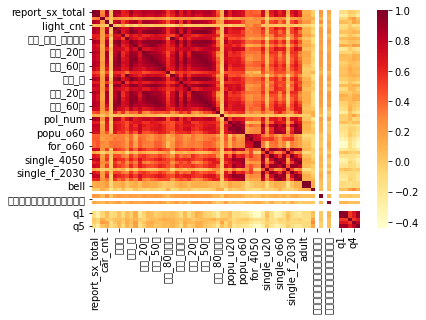

In [74]:
sns.heatmap(df.corr(),cmap="YlOrRd")